In [1]:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv

--2022-10-24 09:09:03--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fnpq3z4bcnoktiv/positive.csv [following]
--2022-10-24 09:09:03--  https://www.dropbox.com/s/raw/fnpq3z4bcnoktiv/positive.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69b0432ddccd2aa9f804975c9f.dl.dropboxusercontent.com/cd/0/inline/BvYEGkwfDS2n3iiWaaDRPWIMEy1UGGDgdI4QZj8VCW2dhjZpnI-wN5OmyrPpyb0BBelh7u9jSpFr8OCaqEUfqlM0dbKwe__0xczElrXqUj3vRg2-u9jTW76-huVlJ8tsBpfqe0KU3DsY8a37tJwvtp3qIhWh54FD4oAElAp-SiTcsw/file# [following]
--2022-10-24 09:09:04--  https://uc69b0432ddccd2aa9f804975c9f.dl.dropboxusercontent.com/cd/0/inline/BvYEGkwfDS2n3iiWaaDRPWIMEy1UGGDgdI4QZj8VCW2dhjZpnI-wN5OmyrPpyb0BBelh7u9jSpFr8

In [8]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 8.2 MB 5.8 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=bc6032e522af7f402553da9a2759c01f112402dfc1616f6ef7a30b385bab3cda
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [215]:
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
import pymorphy2
import matplotlib.pyplot as plt

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

In [4]:
df.head(5)

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [5]:
len(df)

226834

In [10]:
morph = pymorphy2.MorphAnalyzer()

In [11]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords 
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [12]:
df.text.iloc[1]

'Да, все-таки он немного похож на него. Но мой мальчик все равно лучше:D'

In [14]:
print(preprocess(df.text.iloc[1]))

['всё', 'таки', 'немного', 'похожий', 'мальчик', 'всё', 'равно', 'хороший']


In [15]:
preprocessed_text = list(tqdm(map(preprocess, df['text']), total=len(df)))

  0%|          | 0/226834 [00:00<?, ?it/s]

In [16]:
df['text'] = preprocessed_text
df.sample(3)

,text,label
38855,"[svetasweetsveta, херня, инстаграм, сдуреть, с...",negative
4121,"[посмотреть, показать, сегодня, сон, teamfollo...",negative
59273,"[нит, украина, твиттерский, укр, легенда, вчтр...",negative


#### Установка BigARTM

In [17]:
!apt-get --yes update
!apt-get --yes install git make cmake build-essential libboost-all-dev
!apt-get --yes install python-numpy python-pandas python-scipy
!wget https://bootstrap.pypa.io/get-pip.py
!python get-pip.py
!pip install protobuf tqdm wheel
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [985 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:14

In [18]:
%cd bigartm

/content/bigartm


In [19]:
!mkdir build

In [20]:
%cd build

/content/bigartm/build


In [21]:
!cmake ..

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Found Boost: /usr/include (found version "1.65.1")  
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Failed
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - fou

In [22]:
!make

[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/goog

In [23]:
!make install

Consolidate compiler generated dependencies of target libprotobuf
[ 28%] Built target libprotobuf
Consolidate compiler generated dependencies of target libprotoc
[ 61%] Built target libprotoc
Consolidate compiler generated dependencies of target protoc
[ 63%] Built target protoc
[ 63%] Built target proto_generation
Consolidate compiler generated dependencies of target internals_proto
[ 64%] Built target internals_proto
Consolidate compiler generated dependencies of target gflags_static
[ 65%] Built target gflags_static
Consolidate compiler generated dependencies of target glog
[ 68%] Built target glog
Consolidate compiler generated dependencies of target messages_proto
[ 69%] Built target messages_proto
Consolidate compiler generated dependencies of target artm-static
[ 89%] Built target artm-static
Consolidate compiler generated dependencies of target artm
[ 90%] Built target artm
Consolidate compiler generated dependencies of target artm_tests
[ 97%] Built target artm_tests
Consolida

In [24]:
!pip install python/bigartm*.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./python/bigartm-0.10.0-cp37-cp37m-linux_x86_64.whl


In [25]:
import artm

####ARTM модель

In [27]:
artm.ARTM(num_topics=10).info

config {
  topic_name: "topic_0"
  topic_name: "topic_1"
  topic_name: "topic_2"
  topic_name: "topic_3"
  topic_name: "topic_4"
  topic_name: "topic_5"
  topic_name: "topic_6"
  topic_name: "topic_7"
  topic_name: "topic_8"
  topic_name: "topic_9"
  score_config {
    name: "^^^ItemsProcessedScore^^^"
    type: ScoreType_ItemsProcessed
    config: ""
  }
  pwt_name: "pwt"
  nwt_name: "nwt"
  num_document_passes: 10
  reuse_theta: false
  cache_theta: false
}
score {
  name: "^^^ItemsProcessedScore^^^"
  type: "N4artm5score14ItemsProcessedE"
}
processor_queue_size: 0
num_processors: 2

In [28]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [33]:
def convert_to_vw_format(index, row):
    return f'doc{index} {row.text} |topic {row.label}'

In [34]:
with open('tweet_wv.wv', 'w') as f:
    for index, row in df.iterrows():
        vw_string = convert_to_vw_format(index, row)
        f.write(vw_string)
        f.write('\n')

In [35]:
batch_vectorizer = artm.BatchVectorizer(data_path='tweet_wv.wv', 
                                        data_format='vowpal_wabbit',
                                        target_folder='tweet_batches')

In [36]:
%%time 
lda = artm.LDA(num_topics=10, alpha=0.1, beta=0.001, 
               cache_theta=True,
               num_document_passes=5, 
               dictionary=batch_vectorizer.dictionary)

lda.fit_offline(batch_vectorizer=batch_vectorizer, 
                num_collection_passes=10)

CPU times: user 1min 52s, sys: 2.09 s, total: 1min 54s
Wall time: 1min 10s


In [37]:
lda.perplexity_value

[32642.796875,
 1856.4010009765625,
 1599.91845703125,
 1444.4786376953125,
 1354.2684326171875,
 1294.742431640625,
 1252.0936279296875,
 1220.075927734375,
 1195.2921142578125,
 1175.67822265625]

In [38]:
np.log(lda.perplexity_last_value)

7.069600470827474

In [39]:
top_tokens = lda.get_top_tokens(num_tokens=10)
for i, token_list in enumerate(top_tokens):
     print ('Topic #{0}: {1}'.format(i, token_list))

Topic #0: ['любить', 'первый', 'это', 'самый', 'работа', 'http', 'кстати', 'красивый', 'ахахи', 'счастие']
Topic #1: ['сегодня', 'знать', 'очень', 'завтра', 'дом', 'любимый', 'пойти', 'видеть', 'остаться', 'понимать']
Topic #2: ['день', 'человек', 'весь', 'делать', 'сказать', 'утро', 'который', 'хороший', 'свой', 'настроение']
Topic #3: ['год', 'мочь', 'новый', 'хотеться', 'ещё', 'нужно', 'бля', 'час', 'весь', 'большой']
Topic #4: ['спать', 'время', 'болеть', 'купить', 'голова', 'жизнь', 'нужный', 'год', 'плохой', 'наверное']
Topic #5: ['это', 'весь', 'большой', 'наш', 'прийти', 'давать', 'сон', 'надеяться', 'увидеть', 'жаль']
Topic #6: ['хотеть', 'http', 'блин', 'сидеть', 'новый', 'думать', 'стать', 'писать', 'скучать', 'читать']
Topic #7: ['http', 'смотреть', 'друг', 'твой', 'снег', 'хороший', 'забыть', 'говорить', 'жить', 'вроде']
Topic #8: ['ещё', 'спасибо', 'просто', 'сделать', 'написать', 'понять', 'очень', 'мочь', 'ночь', 'фильм']
Topic #9: ['всё', 'почему', 'вообще', 'просто', 

####PLSA модель

In [45]:
plsa = artm.ARTM(num_topics=10, 
                 dictionary=batch_vectorizer.dictionary)

In [46]:
plsa.scores.add(artm.PerplexityScore(name='tweet_perplexity_score',
                 dictionary=batch_vectorizer.dictionary))

In [47]:
plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6))

In [48]:
plsa.fit_offline(batch_vectorizer=batch_vectorizer,
                 num_collection_passes=20)

In [49]:
plsa.score_tracker['tweet_perplexity_score'].value

[30122.921875,
 1579.7935791015625,
 1367.6968994140625,
 1265.3460693359375,
 1202.56494140625,
 1159.6800537109375,
 1128.850830078125,
 1105.8642578125,
 1088.2091064453125,
 1074.3961181640625,
 1063.482666015625,
 1054.7264404296875,
 1047.576416015625,
 1041.712158203125,
 1036.801513671875,
 1032.6805419921875,
 1029.1826171875,
 1026.2027587890625,
 1023.6155395507812,
 1021.3807983398438]

In [50]:
for topic_name in plsa.topic_names:
    print (topic_name + ': ', plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['любить', 'самый', 'первый', 'работа', 'помнить', 'кстати']
topic_1:  ['сегодня', 'очень', 'знать', 'завтра', 'дом', 'пойти']
topic_2:  ['день', 'весь', 'хороший', 'человек', 'делать', 'сказать']
topic_3:  ['мочь', 'год', 'новый', 'хотеться', 'ещё', 'нужно']
topic_4:  ['время', 'спать', 'жизнь', 'болеть', 'ещё', 'купить']
topic_5:  ['это', 'большой', 'наш', 'прийти', 'давать', 'надеяться']
topic_6:  ['хотеть', 'блин', 'думать', 'сидеть', 'писать', 'стать']
topic_7:  ['http', 'смотреть', 'друг', 'твой', 'забыть', 'снег']
topic_8:  ['просто', 'спасибо', 'сделать', 'написать', 'ещё', 'посмотреть']
topic_9:  ['всё', 'вообще', 'почему', 'говорить', 'найти', 'работать']


In [51]:
batch_vectorizer.dictionary.filter(min_tf=10, max_tf=5000)

artm.Dictionary(name=fd60f2bc-b22f-4a90-a597-b5bb1f856a6c, num_entries=12426)

In [63]:
plsa = artm.ARTM(num_topics=10, 
                 dictionary=batch_vectorizer.dictionary, cache_theta= True)
plsa.scores.add(artm.PerplexityScore(name='tweet_perplexity_score',
                dictionary=batch_vectorizer.dictionary))

plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', 
                                    num_tokens=6))
plsa.fit_offline(batch_vectorizer=batch_vectorizer, 
                 num_collection_passes=20)

In [64]:
plsa.score_tracker['tweet_perplexity_score'].value

[303.9162292480469,
 123.04473876953125,
 111.56010437011719,
 103.65628051757812,
 98.2709732055664,
 94.67083740234375,
 92.26705169677734,
 90.63916015625,
 89.51943969726562,
 88.74496459960938,
 88.21206665039062,
 87.84298706054688,
 87.58138275146484,
 87.39067077636719,
 87.2546615600586,
 87.15031433105469,
 87.06912231445312,
 87.00253295898438,
 86.9456558227539,
 86.9018783569336]

In [65]:
for topic_name in plsa.topic_names:
    print (topic_name + ': ', plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['первый', 'болеть', 'работа', 'пока', 'скоро', 'голова']
topic_1:  ['дом', 'видеть', 'понимать', 'остаться', 'равно', 'выходной']
topic_2:  ['вообще', 'делать', 'сказать', 'идти', 'утро', 'сделать']
topic_3:  ['хотеться', 'посмотреть', 'нужно', 'ходить', 'второй', 'ехать']
topic_4:  ['время', 'жизнь', 'купить', 'читать', 'нибыть', 'хотя']
topic_5:  ['большой', 'наш', 'прийти', 'давать', 'нравиться', 'надеяться']
topic_6:  ['блин', 'думать', 'который', 'сидеть', 'писать', 'стать']
topic_7:  ['смотреть', 'говорить', 'спать', 'друг', 'пойти', 'твой']
topic_8:  ['спасибо', 'школа', 'написать', 'ночь', 'понять', 'последний']
topic_9:  ['почему', 'самый', 'любимый', 'найти', 'работать', 'телефон']


In [120]:
plsa.get_phi()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
"(@default_class, bouvtprogecel)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.638158e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(@default_class, lenitsky)",0.000000e+00,1.464244e-04,0.000000e+00,0.000000e+00,2.920520e-07,1.623683e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(@default_class, позаимствовать)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.035366e-04,0.000000e+00,0.000000e+00,0.000000e+00
"(@default_class, старение)",0.000000e+00,0.000000e+00,0.000000e+00,2.164106e-14,1.051436e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(@default_class, битард)",0.000000e+00,9.170630e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
"(@default_class, тупо)",1.583576e-07,1.354291e-12,1.467625e-09,1.736675e-11,6.018368e-13,1.068440e-10,2.249041e-08,2.287348e-03,9.045752e-11,1.210063e-11
"(@default_class, важно)",1.585229e-14,1.650713e-03,4.852055e-15,1.117015e-14,8.714691e-11,5.808412e-11,1.602185e-12,6.456784e-14,2.428650e-15,1.598490e-10
"(@default_class, настя)",4.299297e-03,4.434534e-13,1.228320e-10,5.621364e-12,1.092724e-10,4.235829e-13,1.436262e-10,2.606383e-12,1.146053e-08,6.146215e-12
"(@default_class, patrikoksi)",0.000000e+00,2.297798e-13,1.660414e-16,3.049744e-04,0.000000e+00,0.000000e+00,1.900876e-16,4.688656e-15,2.089910e-10,6.935354e-13


In [212]:
token_topic = plsa.get_phi()
x = range(len(token_topic))

In [213]:
# token_topic = token_topic.loc[token_topic['total'] > 0.002]

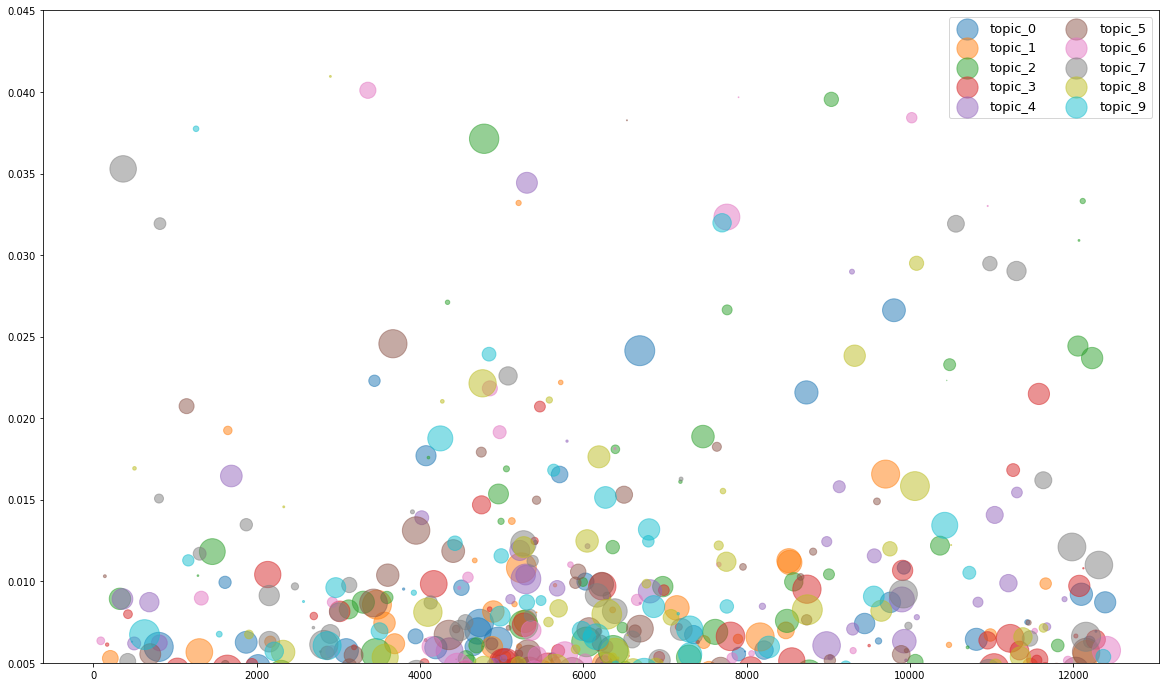

In [219]:
np.random.seed(19680801)

plt.figure(figsize=(20, 12))
colors = np.random.rand(len(token_topic))
area = (30 * np.random.rand(len(token_topic)))**2  # 0 to 15 point radii

for topic in token_topic:
    plt.scatter(x, token_topic[topic], s=area, alpha=0.5)

plt.legend(plsa.topic_names, loc='upper right', ncol=2, fontsize=13)

plt.ylim([0.005, 0.045])

plt.show()

In [106]:
plsa.get_theta().transpose()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
153000,0.000000,3.333327e-01,0.333333,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.333334
153001,0.000000,0.000000e+00,0.333333,0.00,0.000000,0.333334,0.000000,0.333333,0.00,0.000000
153002,0.500000,0.000000e+00,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.25,0.000000
153003,0.000000,8.988088e-15,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.00,0.000000
153004,0.000000,0.000000e+00,0.000000,0.00,0.333333,0.000000,0.333333,0.000000,0.00,0.333334
...,...,...,...,...,...,...,...,...,...,...
22995,0.000000,0.000000e+00,0.000000,0.00,0.200000,0.400000,0.000000,0.400000,0.00,0.000000
22996,0.000000,0.000000e+00,0.666667,0.00,0.000000,0.000000,0.333333,0.000000,0.00,0.000000
22997,0.146071,1.428571e-01,0.000000,0.00,0.000000,0.139661,0.428572,0.142839,0.00,0.000000
22998,0.000000,0.000000e+00,0.250000,0.75,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


###С визуализацией и интерпритацией получилось плоховато)))